In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv2'

In [2]:
def changeImg(img, color):
    alto = img.shape[0]
    ancho = img.shape[1]    
    nombre_color = ""
    imgSalida = np.zeros((alto,ancho, 3)) #Lienzo, arreglo para RGB
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i,j]
            # Extraccion de canales
            red = pixel[0]
            green = pixel[1]
            blue = pixel[2]
            if(color == 1):
                imgSalida[i,j] = [blue,0,0]
                nombre_color = "Blue"
            elif(color == 2):
                imgSalida[i,j] = [0,green,0]
                nombre_color = "Green"
            elif(color == 3):
                imgSalida[i,j] = [0,0,red]
                nombre_color = "Red"
            elif(color == 10):
                imgSalida[i,j] = [0,green,red]
                nombre_color = "Red_Verde"
            elif(color == 20):
                imgSalida[i,j] = [blue,green,0]
                nombre_color = "Green_Blue"
            elif(color == 30):
                imgSalida[i,j] = [blue,0,red]
                nombre_color = "Blue_Red"
                
    write_and_show(imgSalida,nombre_color) 

In [18]:
def write_and_show(imgSalida,color):
    cv2.imwrite("jw"+color+".jpg", imgSalida)
    imgTemp = cv2.imread("jw"+color+".jpg")
    imgTemp = cv2.cvtColor(imgTemp, cv2.COLOR_BGR2RGB)
    plt.imshow(imgTemp)

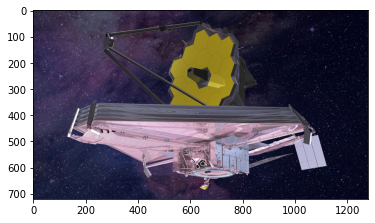

In [19]:
#Cargando y visualizando imagen a convertir
img = cv2.imread('jw.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

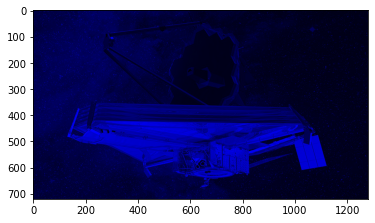

In [21]:
changeImg(img,1)

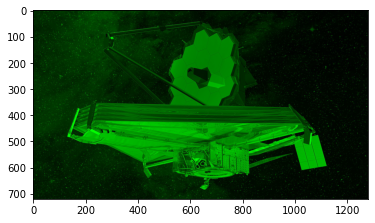

In [20]:
changeImg(img,2)


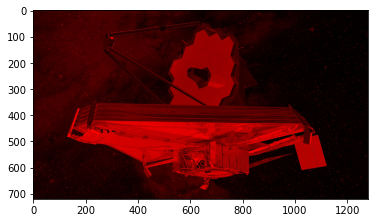

In [22]:
changeImg(img,3)

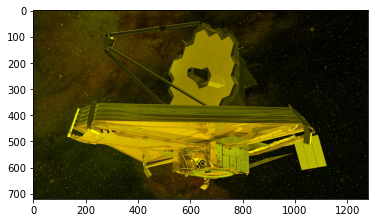

In [23]:
changeImg(img,10)

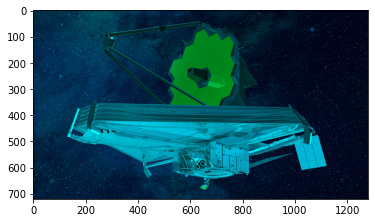

In [24]:
changeImg(img,20)

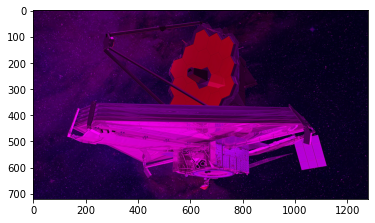

In [25]:
changeImg(img,30)

## Problema 3

#### Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2.

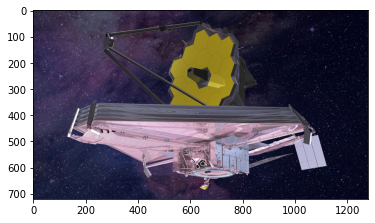

In [26]:
plt.imshow(img)
alto = img.shape[0]
ancho = img.shape[1]  
gray_green = np.zeros((alto,ancho,1))
gray_blue = np.zeros((alto,ancho,1))
gray_red = np.zeros((alto,ancho,1))
gray_aritmetica = np.zeros((alto,ancho,1))
gray_ponderado = np.zeros((alto,ancho,1))

In [27]:
for i in range(0,alto):
    for j in range(0,ancho):
        pixel = img[i,j]
        gray_blue[i,j] = pixel[2]
        gray_green[i,j] = pixel[1]
        gray_red[i,j] = pixel[0]
        
        gray_aritmetica[i,j] = np.mean(pixel)
        gray_ponderado[i,j] = int(0.299*pixel[2] + 0.587*pixel[1] + 0.114*pixel[0])

In [28]:
def write_and_show(strImg, arrImg):
    cv2.imwrite(strImg, arrImg)
    imgTemp = cv2.imread(strImg)
    imgTemp = cv2.cvtColor(imgTemp, cv2.COLOR_BGR2RGB)
    plt.imshow(imgTemp)

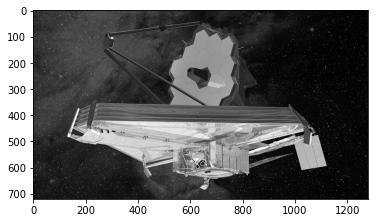

In [29]:
write_and_show("gray_rojo.jpg",gray_red)

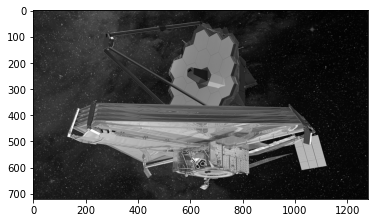

In [30]:
write_and_show("gray_verde.jpg",gray_green)

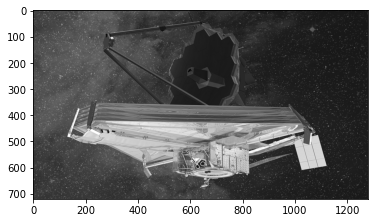

In [31]:
write_and_show("gray_azul.jpg",gray_blue)

# Problema 4

#### Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una lnea vertical la cual muestre el valor de la media de la distribucion.

In [36]:
imgP = cv2.imread('jw.jpg')
imgP = cv2.cvtColor(imgP, cv2.COLOR_BGR2RGB)

In [33]:
def grafic(img,tit):
    im=img
    fig, axs = plt.subplots(1,2, figsize=(35, 10))
    fig.suptitle(tit,fontsize=35)
    color = ('b', 'g', 'r') 
    
    for i, col in enumerate(color): 
        histr = cv2.calcHist([im],[i], None,[256],[0, 256])
        axs[1].set_title('Histograma',fontsize=20)
        axs[1].plot(histr, color = col)
        axs[1].axis(xmin=0,xmax=256)
    axs[0].set_title('Imagen',fontsize=20)
    axs[0].imshow(im, origin='upper')
    plt.show()
    return(None)

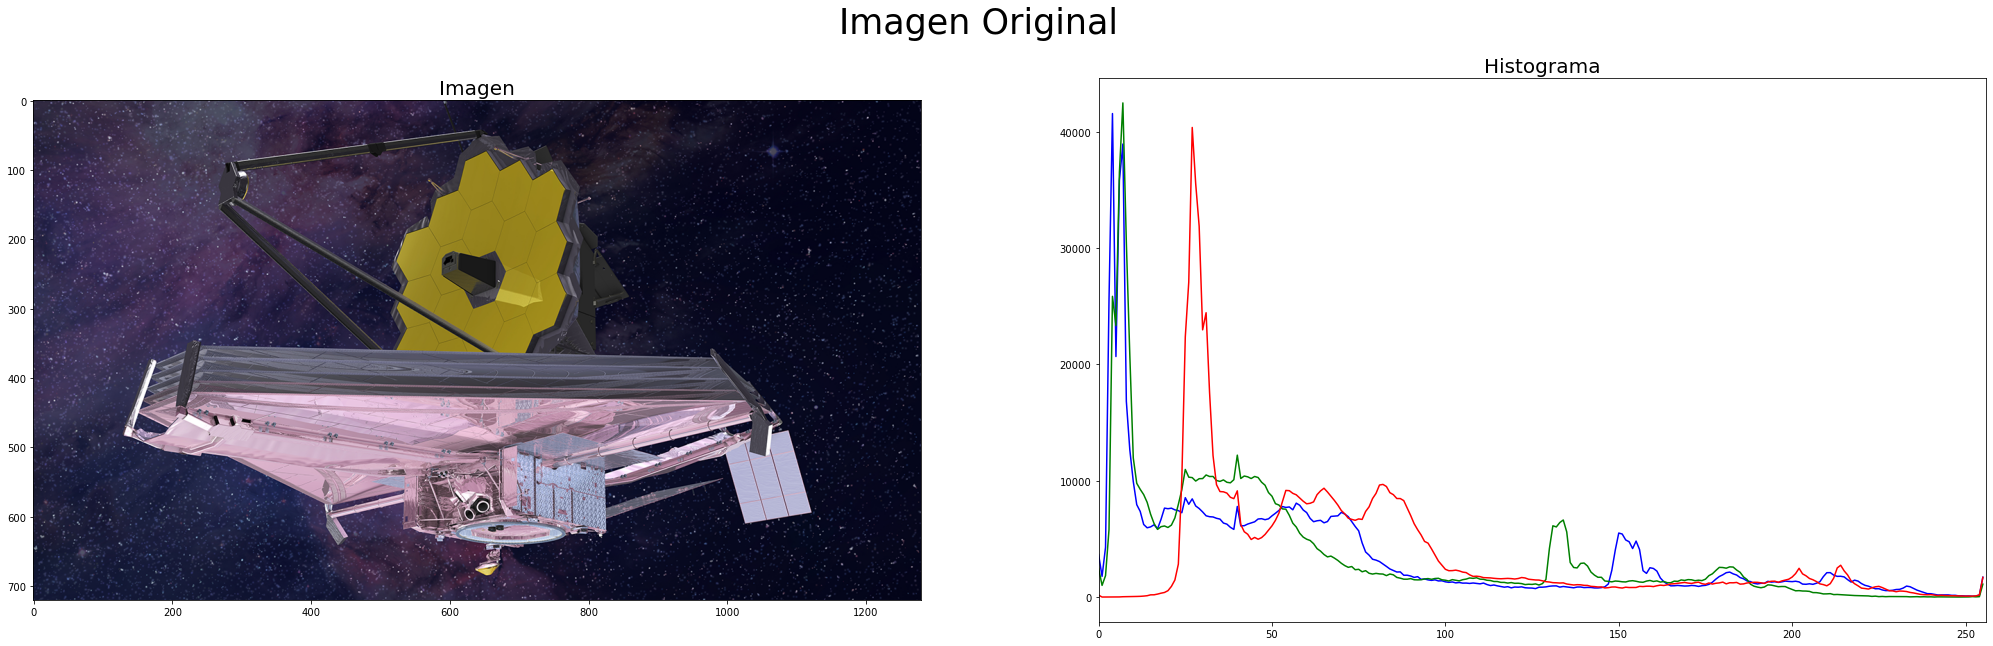

In [37]:
grafic(imgP,"Imagen Original")